## K-NN Classifier 

In [1]:
import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

### Load the Wine Quality Dataset

In [2]:
column_names = ['fixed_acidity', 'volatile-acidity', 
                'citric-acid', 'residual-sugar', 
                'chlorides', 'free-sulphur-dioxide', 
                'total-sulpher-dioxide', 'density', 
                'pH', 'sulphates', 'alcohol', 'quality']
data = pd.read_csv("datasets/wine_quality/winequality-white.csv", sep=";")

data['quality'] = np.where(data['quality'] >= 5, 1, 0)

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [3]:
target = data.loc[:, ['quality']]
target.head()

,quality
0,1
1,1
2,1
3,1
4,1


### Dimensions

In [4]:
# print("Dimension of the data: {}".format(features.shape))

# no_of_rows = features.shape[0]
# no_of_cols = features.shape[1]

# print("Number of rows: {}".format(no_of_rows))
# print("Numer of cols: {}".format(no_of_cols))

### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E40DBC7E08>,
      dtype=object)

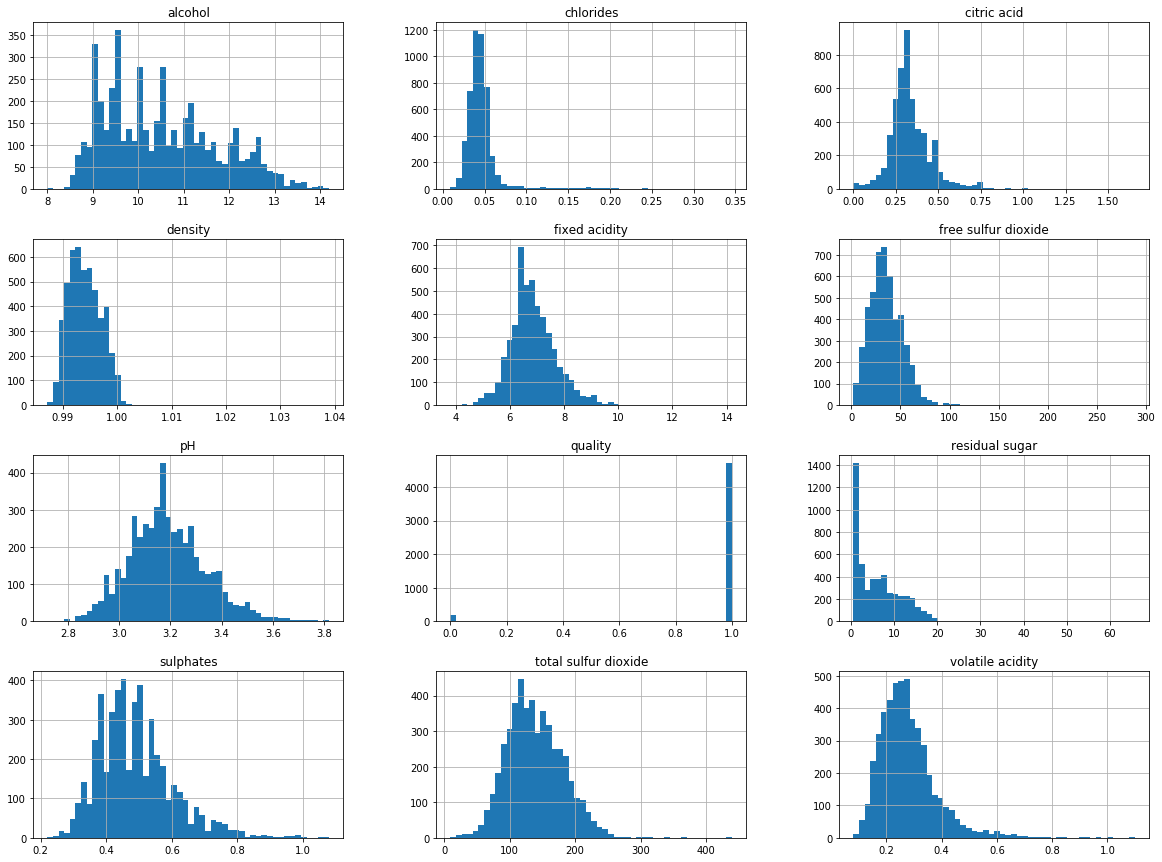

In [5]:
%matplotlib inline

data.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E40DBF9DC8>,
      dtype=object)

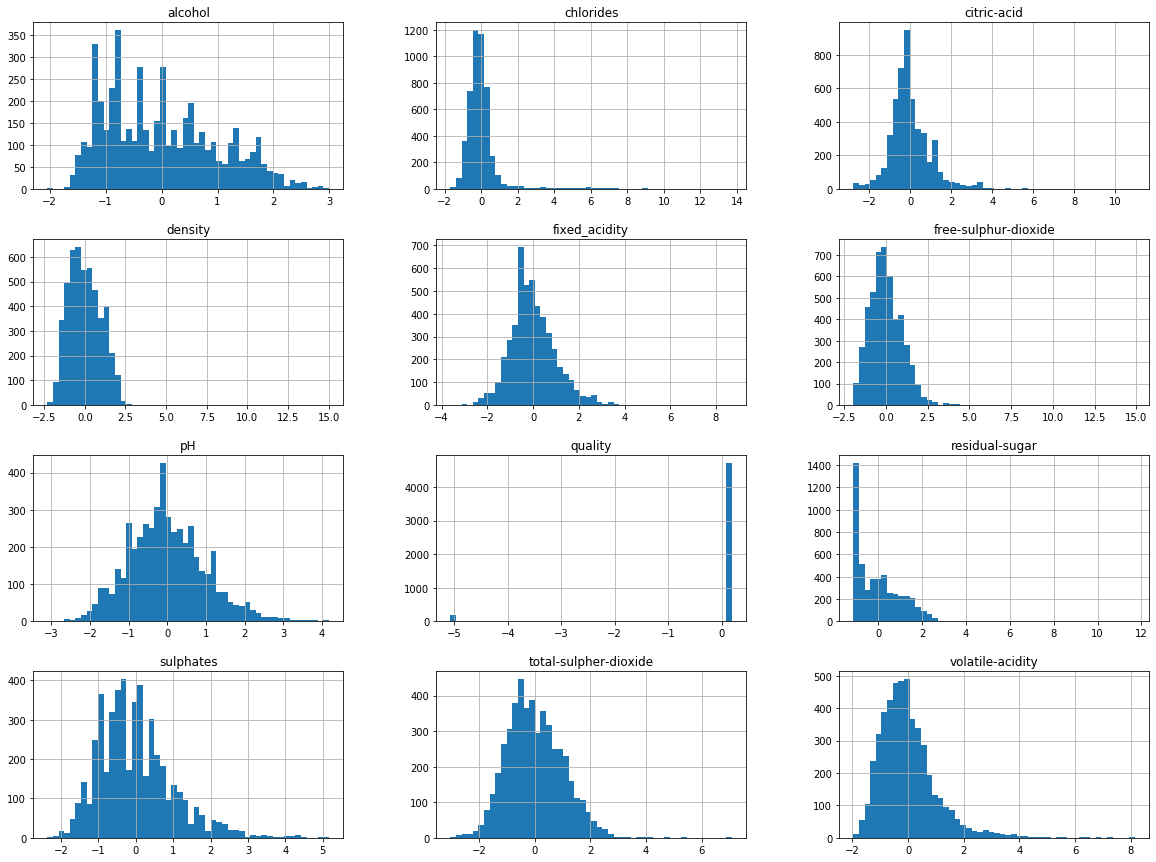

In [6]:
scaler = StandardScaler().fit(data)
features_std = scaler.transform(data)
df = pd.DataFrame(data=features_std[:],
                  index=list(range(0,len(features_std))),
                  columns=column_names)

df.hist(bins=50, figsize=(20, 15))

### Drop Redundent Features

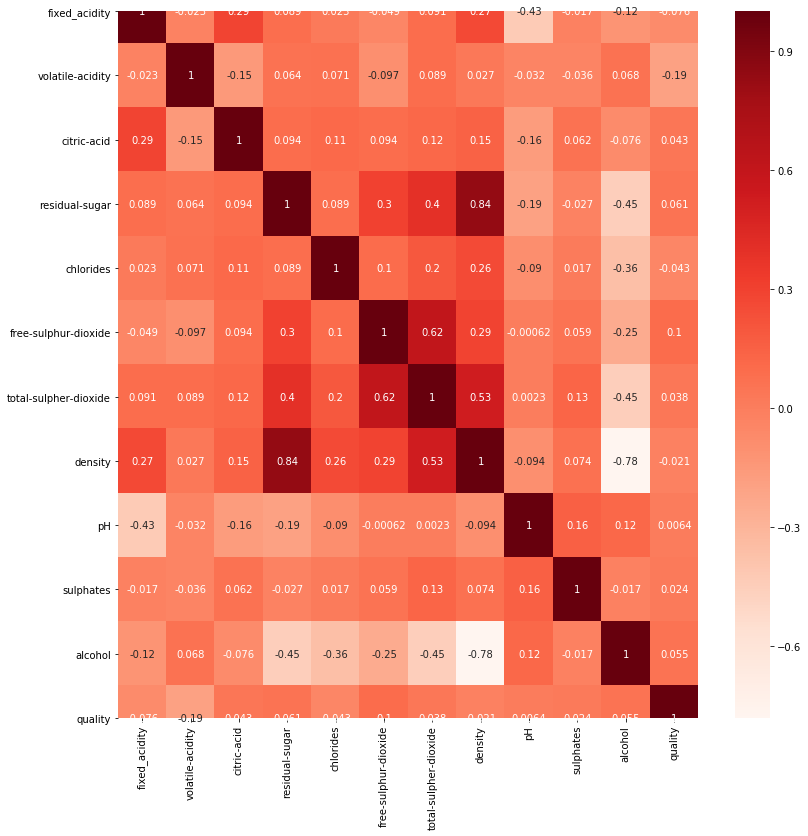

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(13,13))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#Correlation with output variable
cor_target = abs(cor["quality"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

fixed_acidity           0.076136
volatile-acidity        0.191062
residual-sugar          0.061003
free-sulphur-dioxide    0.100491
alcohol                 0.054559
quality                 1.000000
Name: quality, dtype: float64

In [9]:
df.drop(['citric-acid', 'chlorides', 'total-sulpher-dioxide', 'density', 'pH', 'sulphates'], axis=1, inplace=True)
df.head()

,fixed_acidity,volatile-acidity,residual-sugar,free-sulphur-dioxide,alcohol,quality
0,0.172097,-0.081770,2.821349,0.569932,-1.393152,0.197008
1,-0.657501,0.215896,-0.944765,-1.253019,-0.824276,0.197008
2,1.475751,0.017452,0.100282,-0.312141,-0.336667,0.197008
3,0.409125,-0.478657,0.415768,0.687541,-0.499203,0.197008
4,0.409125,-0.478657,0.415768,0.687541,-0.499203,0.197008


In [10]:
print(df[['fixed_acidity', 'volatile-acidity']].corr())
print(df[['residual-sugar', 'fixed_acidity']].corr())

df.drop('fixed_acidity', axis=1, inplace=True)
df.head()

                  fixed_acidity  volatile-acidity
fixed_acidity          1.000000         -0.022697
volatile-acidity      -0.022697          1.000000
                residual-sugar  fixed_acidity
residual-sugar        1.000000       0.089021
fixed_acidity         0.089021       1.000000


,volatile-acidity,residual-sugar,free-sulphur-dioxide,alcohol,quality
0,-0.081770,2.821349,0.569932,-1.393152,0.197008
1,0.215896,-0.944765,-1.253019,-0.824276,0.197008
2,0.017452,0.100282,-0.312141,-0.336667,0.197008
3,-0.478657,0.415768,0.687541,-0.499203,0.197008
4,-0.478657,0.415768,0.687541,-0.499203,0.197008


In [11]:
print(df[['residual-sugar', 'free-sulphur-dioxide']].corr())
# print(df[['free-sulphur-dioxide', 'alcohol']].corr())

df.drop(['alcohol', 'quality'], axis=1, inplace=True)
df.head()

                      residual-sugar  free-sulphur-dioxide
residual-sugar              1.000000              0.299098
free-sulphur-dioxide        0.299098              1.000000


,volatile-acidity,residual-sugar,free-sulphur-dioxide
0,-0.081770,2.821349,0.569932
1,0.215896,-0.944765,-1.253019
2,0.017452,0.100282,-0.312141
3,-0.478657,0.415768,0.687541
4,-0.478657,0.415768,0.687541


### Train-Test Split

In [110]:
mask = np.random.rand(len(df)) < 0.8
train_X = df[mask]
train_Y = target[mask]

test_X = df[~mask]
test_Y = target[~mask]

print(train_Y.info())
print(type(train_X))
print(len(test_Y))
print(len(test_X))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3929 entries, 0 to 4897
Data columns (total 1 columns):
quality    3929 non-null int32
dtypes: int32(1)
memory usage: 46.0 KB
None
<class 'pandas.core.frame.DataFrame'>
969
969


## K-NN Class

In [126]:
class kNN:
    def __init__(self):
        pass
    
    def euclidean_distance(self, vector1, vector2):
        diff = np.subtract(vector1, vector2)
        
        return np.sqrt(np.sum(np.power(diff, 2)))
    
    def manhatten_distance(self, vector1, vector2):
        return np.sum(np.absolute(vector1-vector2))
    
    def fit(self, X, Y, n_neighbors, weights='uniform', **kwargs):
        
        self.train_X = X
        self.Y = Y
        self.k = n_neighbors
        
    
    def predict(self, X, train=True):
        
        preds = []
        pred_idx = 0
        count = 0
        total = len(X)
        print("No. of examples: {}".format(len(X)))
        # for each training example
        for row in X:
            dist_arr = []
            class_arr = []
            if train:
                print("Training done {} %".format(round(count/total*100)), end="\r")
            else:
                print("Testing done {} %".format(round(count/total*100)), end="\r")
            count += 1
            # loop through all the other training examples
            for ex in range(len(self.train_X)):
                example = self.train_X[ex]
                clas = self.Y[ex]
                if not np.array_equal(example, row):
                    dist = self.euclidean_distance(example, row)
                    dist_arr.append(dist)
                    class_arr.append(clas)
                    
            dist_arr = np.asarray(dist_arr)
            a = np.argsort(dist_arr)
            
            # pick the top n closest neighbors
            a = a[:self.k]
            zeros = 0
            ones = 0
            
            for i in a:
                if class_arr[i] == 0:
                    zeros += 1
                else:
                    ones += 1
            if zeros <= ones:
                preds.append(1)
            else:
                preds.append(0)
                
            pred_idx += 1
        
        print("\nNumber of predictions: {}".format(len(preds)))
        print("DONE!!!\n\n\n\n")
        return np.asarray(preds)
    
    
    def accuracy(self, preds, labels):
        #calculate accuracy
        error = 0
        for i in range(len(labels)):
            if preds[i] == labels[i]:
                  error += 1

        print("Matching Predictions: {} out of {}".format(error, len(labels)))
        return round(error/len(labels)*100,2)

In [127]:
knn_classifier = kNN()


knn_classifier.fit(train_X.to_numpy(), train_Y.to_numpy(), 5)
predictions = knn_classifier.predict(train_X.to_numpy())
train_accuracy = knn_classifier.accuracy(predictions, train_Y.to_numpy())
print("Train Accuracy: {}%".format(train_accuracy))

No. of examples: 3929
Training done 100 %
Number of predictions: 3929
DONE!!!




Matching Predictions: 3770 out of 3929
Train Accuracy: 95.95%


In [128]:
knn_classifier = kNN()
knn_classifier.fit(train_X.to_numpy(), train_Y.to_numpy(), 5)
predictions = knn_classifier.predict(test_X.to_numpy(), train=False)
test_accuracy = knn_classifier.accuracy(predictions, test_Y.to_numpy())
print("Test Accuracy: {}%".format(test_accuracy))

No. of examples: 969
Testing done 100 %
Number of predictions: 969
DONE!!!




Matching Predictions: 935 out of 969
Test Accuracy: 96.49%
